*CONTEXTO*
Problema: uma produtora de filmes chamada MegaPik está tendo prejuizos nos últimos filmes lançados. E através dos dados, a produtora quer saber o que o público gostou no passado para determinar se o sucesso passado dos filmes podem ser replicados.

Perguntas para descobrir o gosto PRELIMINAR do público:
1. Quais filmes tiveram maior bilheteria no fim de semana e primeira noite?
2. Quais generos foram melhores na bilheteria no fim de semana e primeira noite?
3. Quais paises tiveram maior bilheteria no fim de semana e primeira noite?
4. Em qual epoca do ano o público tem maior bilheteria?
5. Qual duração de filmes obtem maior bilheteria?

In [20]:
import pandas as pd

df = pd.read_csv("megapik_filmes_abertura_2010_2025.csv")

display(df.head())

,nome do filme,data lançamento,gênero,duração (min),origem,receita fim semana abertura,receita noite abertura,orçamento,custo marketing
0,Mirage,2022-05-04,thriller,112,Índia-WB,15.52,5.68,23.50,7.05
1,Storm: Afterlight,2015-05-07,action,124,Nigéria-Kano,43.78,18.28,50.79,20.40
2,Rush,2012-09-06,action,107,Reino Unido-NIR,19.87,9.04,32.85,16.94
3,Embers 2,2021-11-18,drama,121,Canadá-MB,18.37,5.91,35.19,16.28
4,Neon 2,2020-06-11,thriller,110,México-JAL,23.55,5.00,29.80,11.08


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nome do filme                1000 non-null   object 
 1   data lançamento              1000 non-null   object 
 2   gênero                       1000 non-null   object 
 3   duração (min)                1000 non-null   int64  
 4   origem                       1000 non-null   object 
 5   receita fim semana abertura  1000 non-null   float64
 6   receita noite abertura       1000 non-null   float64
 7   orçamento                    1000 non-null   float64
 8   custo marketing              1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [22]:
# 1. Quais filmes tiveram maior bilheteria no fim de semana e primeira noite?
total_por_filme = df.groupby('nome do filme') [['receita fim semana abertura','receita noite abertura']].sum().reset_index()
total_por_filme = total_por_filme.sort_values(by='receita fim semana abertura', ascending=False)

total_por_filme["ranking"] = total_por_filme["receita fim semana abertura"].rank(method="dense", ascending=False).astype(int)

total_por_filme = total_por_filme[["ranking", "nome do filme", "receita fim semana abertura", "receita noite abertura"]]

display(total_por_filme.head(10))


,ranking,nome do filme,receita fim semana abertura,receita noite abertura
236,1,Rift,1176.87,384.30
227,2,Quantum,1099.50,349.43
37,3,Eclipse,1084.66,372.88
202,4,Paws,860.23,275.28
215,5,Pulse,838.59,329.12
11,6,Chronicles,826.67,285.40
274,7,Storm,802.33,317.61
0,8,Aurora,773.95,251.54
291,9,Voyage,758.87,242.60
250,10,Rush,645.10,233.76


In [23]:
# 2.
total_por_genero = df.groupby('gênero')[['receita fim semana abertura','receita noite abertura']].sum().reset_index()
total_por_genero = total_por_genero.sort_values(by="receita fim semana abertura",ascending=False)

total_por_genero ["ranking"] = total_por_genero["receita fim semana abertura"].rank(method="dense", ascending=False).astype (int)
total_por_genero = total_por_genero[["ranking", "gênero", "receita fim semana abertura", "receita noite abertura"]]

display(total_por_genero)

,ranking,gênero,receita fim semana abertura,receita noite abertura
7,1,sci-fi,5939.88,1984.36
0,2,action,5834.19,2153.03
1,3,adventure,3347.59,1061.92
4,4,fantasy,3050.70,1008.83
8,5,thriller,2665.57,928.72
2,6,animation,1743.40,538.92
3,7,drama,1596.15,491.27
5,8,horror,761.54,291.25
9,9,western,622.04,195.01
6,10,romance,602.50,185.77


In [24]:
#3. 

df ["origem"] = df["origem"].str.split("-").str[0]
filme_por_pais = df.groupby("origem")["origem"].count().sort_values(ascending=False)

total_por_area = df.groupby("origem")[["receita fim semana abertura", "receita noite abertura"]].sum().reset_index()
total_por_area = total_por_area.sort_values(by="receita fim semana abertura", ascending=False)

total_por_area ["ranking"] = total_por_area["receita fim semana abertura"].rank(method="dense", ascending=False).astype(int)
total_por_area = total_por_area[["ranking", "origem", "receita fim semana abertura", "receita noite abertura"]]

display(filme_por_pais.head(10))
display(total_por_area.head(10))

origem
EUA              504
Brasil           187
Reino Unido       61
Índia             51
Canadá            46
Japão             31
França            29
Coreia do Sul     21
México            21
Espanha           13
Name: origem, dtype: int64

,ranking,origem,receita fim semana abertura,receita noite abertura
5,1,EUA,13589.19,4618.92
2,2,Brasil,4737.25,1582.85
11,3,Reino Unido,1370.65,472.19
12,4,Índia,1299.18,441.74
3,5,Canadá,1123.29,365.46
8,6,Japão,1001.90,338.94
7,7,França,759.74,241.37
4,8,Coreia do Sul,586.34,196.25
10,9,Nigéria,407.10,132.16
9,10,México,401.09,141.87


gênero,action,adventure,animation,drama,fantasy,horror,romance,sci-fi,thriller,western
mes,,,,,,,,,,
1,519.80,144.98,44.60,49.70,237.29,46.99,43.59,305.41,109.98,18.06
2,618.31,185.83,101.89,75.01,147.75,39.74,64.49,583.39,226.72,33.69
3,199.16,301.32,173.93,117.16,164.24,63.73,53.35,678.46,165.71,24.34
4,339.95,223.72,67.22,182.48,218.65,69.85,90.72,226.49,165.36,23.20
5,487.35,487.39,70.75,165.01,342.42,54.82,40.63,515.90,185.83,208.32
6,726.76,530.57,364.00,140.94,289.42,120.78,50.53,203.06,228.15,40.94
7,636.99,375.33,349.50,156.94,335.77,112.21,55.57,717.77,316.38,65.14
8,413.94,273.27,94.28,158.06,149.85,68.82,39.68,476.41,230.04,0.00
9,615.87,189.36,65.04,100.77,71.71,61.79,15.21,440.81,231.53,0.00


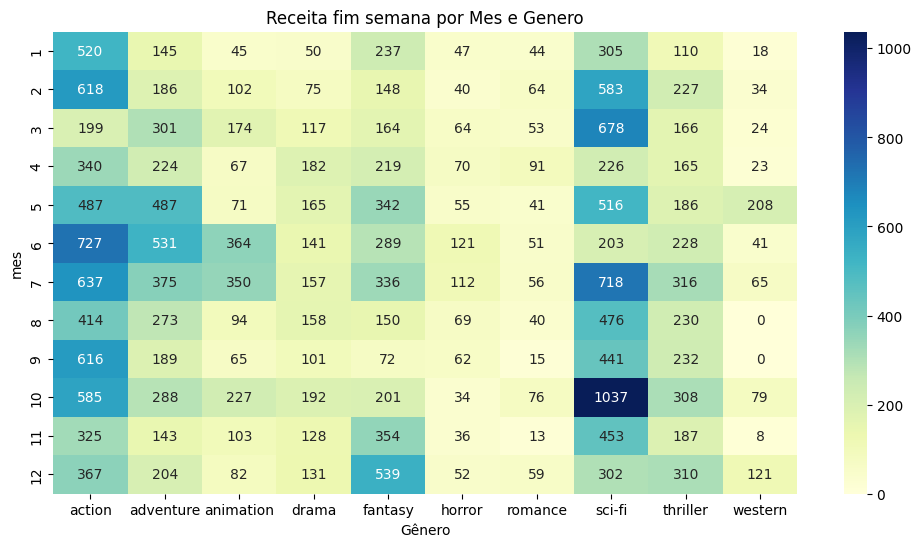

In [25]:
# 4 
import matplotlib.pyplot as plt
import seaborn as sns

df ["data lançamento"] = pd.to_datetime(df["data lançamento"], errors="coerce")
df ["mes"] = df["data lançamento"].dt.month

receita_mes_genero = df.groupby(["mes", "gênero"])["receita fim semana abertura"].sum().reset_index().sort_values(["mes", "receita fim semana abertura"], ascending=[True, False])
tabela = df.groupby(["mes", "gênero"])["receita fim semana abertura"].sum().unstack(fill_value=0)

tabela_pivot = receita_mes_genero.pivot(index="mes", columns="gênero", values="receita fim semana abertura").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(tabela, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Receita fim semana por Mes e Genero")
plt.xlabel("Gênero")
plt.ylabel("mes")

display(tabela_pivot)
plt.show()


,ano,receita fim semana abertura
0,2010,408.63
1,2011,776.28
2,2012,799.69
3,2013,844.46
4,2014,1163.84
5,2015,1108.44
6,2016,1932.07
7,2017,1784.65
8,2018,2680.07
9,2019,2489.31


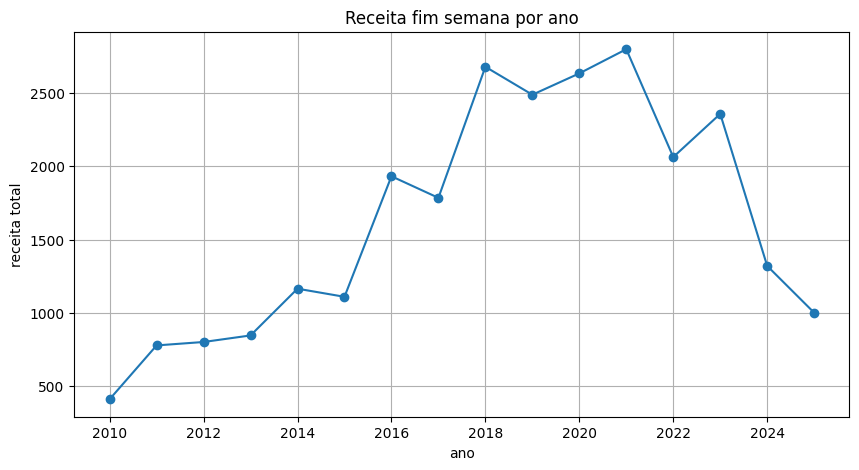

In [26]:
import matplotlib.pyplot as plt

df["ano"] = pd.to_datetime(df["data lançamento"]).dt.year
receita_por_ano = df.groupby("ano")["receita fim semana abertura"].sum().reset_index()

display(receita_por_ano)

plt.figure(figsize=(10, 5))
plt.plot(receita_por_ano["ano"], receita_por_ano["receita fim semana abertura"], marker="o")
plt.title("Receita fim semana por ano")
plt.xlabel("ano")
plt.ylabel("receita total")
plt.grid(True)
plt.show()

In [27]:
bins = [0, 90, 120, 150, 180, 300]
labels = ["curto(<90)", "médio(90-120)", "longo(120-150)", "muito longo (150-180)", "extremo (>180)"]
df["faixa_duracao"] = pd.cut(df["duração (min)"], bins=bins, labels=labels)

media_receita = df.groupby("faixa_duracao")["receita fim semana abertura"].sum()
display(media_receita)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_12580\3729261946.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_receita = df.groupby("faixa_duracao")["receita fim semana abertura"].sum()


faixa_duracao
curto(<90)                 875.35
médio(90-120)            12747.78
longo(120-150)           12173.27
muito longo (150-180)      367.16
extremo (>180)               0.00
Name: receita fim semana abertura, dtype: float64

#Padrões gerais
1. filmes de maior receita são Rift, Quantum e Eclipse
2. O gênero sci-fi e action estão no topo
3. O pais com maior receita são EUA e Brasil
4. Sci-fi e action são apreciados o ano inteiro, principalmente no 2º semestre
5. Apartir de 2018 houve aumento recorde de receita, mas em 2022 começou a despencar
6. O público gosta mais de filmes de duração média (90-120) e longa (120-150) 

In [28]:
# 1. filmes de maior receita são Rift, Quantum e Eclipse
top_filmes = (
    df[df["nome do filme"].isin(["Rift", "Quantum", "Eclipse", "Paws", "Pulse"])]
    .groupby("nome do filme")
    .agg({
        "gênero": "first",
        "duração (min)": "mean",
        "receita fim semana abertura": "sum",
        "orçamento": "sum"
    }).reset_index())
display(top_filmes)



,nome do filme,gênero,duração (min),receita fim semana abertura,orçamento
0,Eclipse,sci-fi,123.884615,1084.66,1462.36
1,Paws,animation,101.781250,860.23,1106.89
2,Pulse,action,120.350000,838.59,1023.58
3,Quantum,sci-fi,122.615385,1099.50,1411.83
4,Rift,sci-fi,126.785714,1176.87,1527.39


In [29]:
filtro_genero = df["gênero"].isin(["sci-fi", "action"])
df_filtrado = df[filtro_genero]

resumo = df_filtrado.groupby("gênero")[["receita fim semana abertura", "receita noite abertura", "orçamento", "custo marketing"]].sum().round(2)
display(resumo)

,receita fim semana abertura,receita noite abertura,orçamento,custo marketing
gênero,,,,
action,5834.19,2153.03,6486.24,4138.60
sci-fi,5939.88,1984.36,7346.86,4910.95


In [30]:
top_brasil = df[df["origem"] == "Brasil"].nlargest(100, "receita fim semana abertura")
generos_brasil = top_brasil["gênero"].value_counts()

top_eua = df[df["origem"] == "EUA"].nlargest(100,"receita fim semana abertura")
generos_eua = top_eua["gênero"].value_counts()

display(generos_brasil)
display(generos_eua)

gênero
sci-fi       27
action       20
adventure    17
fantasy      12
animation    10
thriller     10
western       2
drama         1
horror        1
Name: count, dtype: int64

gênero
action       42
sci-fi       30
adventure    12
fantasy      11
animation     4
thriller      1
Name: count, dtype: int64

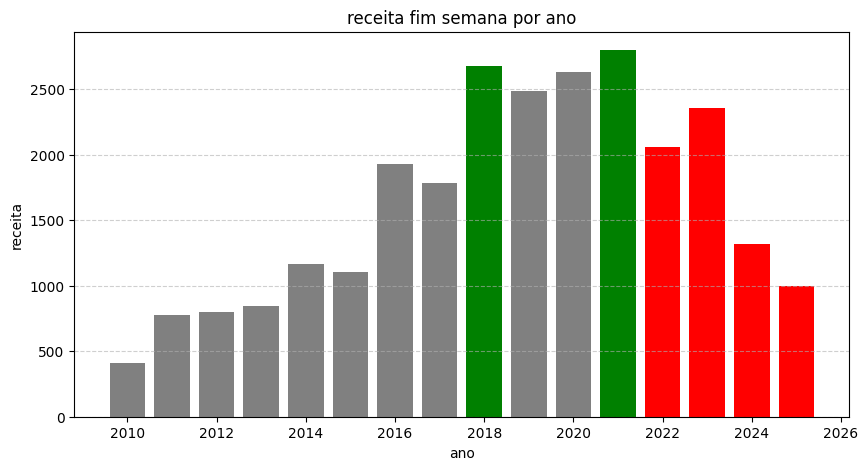

In [31]:
# Categorizar melhor melhor periodo vs periodo de queda
cores = []
for ano in receita_por_ano["ano"]:
    if ano in [2018, 2021]:
        cores.append("green")
    elif 2022 <= ano <= 2025:
        cores.append("red")
    else:
        cores.append("gray")

plt.figure(figsize=(10, 5))
plt.bar(receita_por_ano["ano"], receita_por_ano["receita fim semana abertura"], color=cores)

plt.title("receita fim semana por ano")
plt.xlabel("ano")
plt.ylabel("receita")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [53]:
filmes_melhor_periodo = df[df["ano"].isin([2018, 2019, 2020, 2021])]

filmes_melhor_periodo_resumo = filmes_melhor_periodo[
    ["nome do filme", "ano", "gênero", "orçamento", "receita fim semana abertura"]
].sort_values(by="receita fim semana abertura", ascending=False)

qtd_filmes_melhor_periodo = filmes_melhor_periodo_resumo.shape[0]
soma_melhor_periodo = filmes_melhor_periodo["receita fim semana abertura"].sum()
media_melhor_periodo = filmes_melhor_periodo["receita fim semana abertura"].mean()

print("Quantidade filmes lançados no melhor periodo: ", qtd_filmes_melhor_periodo)
print("Soma do melhor periodo: ", soma_melhor_periodo)
print ("Média melhor periodo: ", media_melhor_periodo)
filmes_melhor_periodo_resumo.head(10)

Quantidade filmes lançados no melhor periodo:  376
Soma do melhor periodo:  10604.7
Média melhor periodo:  28.20398936170213


,nome do filme,ano,gênero,orçamento,receita fim semana abertura
474,Aurora,2020,fantasy,111.50,166.26
780,Quantum,2018,sci-fi,173.72,159.31
68,Storm 5: Origins,2018,action,76.18,125.87
566,Storm 4,2021,action,93.95,118.69
329,Eclipse,2019,sci-fi,188.46,111.62
130,Eclipse 3,2018,sci-fi,126.77,106.84
803,Aurora: Revenant,2019,fantasy,136.57,90.81
683,Odyssey: Origins,2020,adventure,73.76,90.28
19,MegaPik Pulse: Origins,2019,action,53.30,85.79
324,Pulse,2018,action,155.30,85.36


In [52]:
filmes_queda_periodo = df[df["ano"].isin([2022,2023,2024,2025])]

filmes_queda_periodo_resumo = filmes_queda_periodo[
    ["nome do filme", "ano", "gênero", "orçamento", "receita fim semana abertura"]
].sort_values(by="receita fim semana abertura", ascending=False)

qtd_filmes_queda_periodo = filmes_queda_periodo_resumo.shape[0]
soma_queda_periodo = filmes_queda_periodo["receita fim semana abertura"].sum()

media_queda_periodo = filmes_queda_periodo["receita fim semana abertura"].mean()

print ("Quantidade de filmes lançados na queda: ", qtd_filmes_queda_periodo)
print ("Soma total de filmes na queda: ", soma_queda_periodo)
print ("Média na queda: ", media_queda_periodo)
filmes_queda_periodo_resumo.head(10)

Quantidade de filmes lançados na queda:  250
Soma total de filmes na queda:  6740.799999999999
Média na queda:  26.963199999999997


,nome do filme,ano,gênero,orçamento,receita fim semana abertura
610,Pulse,2025,action,94.40,117.77
504,Quantum,2023,sci-fi,124.93,101.92
370,Rush,2022,action,116.93,94.83
857,Eclipse,2023,sci-fi,93.44,89.95
462,Storm 6,2023,action,70.35,87.24
869,MegaPik Eclipse: Reckoning,2023,sci-fi,72.70,87.03
237,Aurora,2024,fantasy,97.44,80.96
511,Rift,2024,sci-fi,72.34,79.03
850,Eclipse,2022,sci-fi,86.10,78.24
812,MegaPik Eclipse,2022,sci-fi,84.72,71.01


In [41]:
# Se a coluna de data estiver em formato string, converter para datetime
df["data lançamento"] = pd.to_datetime(df["data lançamento"], errors="coerce")

# Criar coluna de mês e ano
df["mes"] = df["data lançamento"].dt.month
df["ano"] = df["data lançamento"].dt.year

# Agora filtrar outubro (10) e gênero Sci-Fi
sci_fi_outubro = df[(df["mes"] == 10) & (df["gênero"].str.lower() == "sci-fi")]

# Mostrar os principais resultados
sci_fi_outubro_resumo = sci_fi_outubro[
    ["nome do filme", "ano", "mes", "gênero", "receita fim semana abertura", "orçamento", "custo marketing"]
].sort_values(by="receita fim semana abertura", ascending=False)

qtd_filmes = sci_fi_outubro_resumo.shape[0]

print("Quantidade de filmes sci-fi em outubro: ", qtd_filmes)
sci_fi_outubro_resumo.head(10)

Quantidade de filmes sci-fi em outubro:  21


,nome do filme,ano,mes,gênero,receita fim semana abertura,orçamento,custo marketing
780,Quantum,2018,10,sci-fi,159.31,173.72,114.20
329,Eclipse,2019,10,sci-fi,111.62,188.46,151.82
857,Eclipse,2023,10,sci-fi,89.95,93.44,72.95
943,Rift,2018,10,sci-fi,78.27,89.87,73.93
986,Rift,2020,10,sci-fi,77.84,90.55,81.11
543,Eclipse: Eclipse,2019,10,sci-fi,63.79,63.40,50.72
73,Eclipse,2023,10,sci-fi,54.27,78.08,58.10
832,MegaPik Eclipse,2015,10,sci-fi,47.37,89.29,70.52
91,Rift: Uprising,2021,10,sci-fi,42.17,47.17,32.55
434,Rift,2024,10,sci-fi,39.77,49.29,38.08
